In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway


In [18]:
df_complete= pd.read_csv('dataset.csv',index_col=0)

### HUMAN = 0
 
### AI = 1

In [19]:
# Crear un diccionario de mapeo
mapping = {'Human-Generated-Text': 0, 'AI-Generated-Text': 1}

In [20]:
#Reemplazar las clases en la columna 'class' con el mapeo

df_complete['class'] = df_complete['class'].map(mapping)

In [21]:
df_complete.head()

,text,class
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,1
1,Mount Washington is a peak in the White Mount...,1
2,Acer hillsi is an extinct maple species that w...,1
3,Derrick George Sherwin (16 April 1936 – 17 Oct...,0
4,The Windows shell is the graphical user interf...,0


In [22]:
df_complete['len_text'] = df_complete['text'].str.len()

In [23]:
df_class_human = df_complete[df_complete['class'] == 0]
df_class_ai = df_complete[df_complete['class'] == 1]

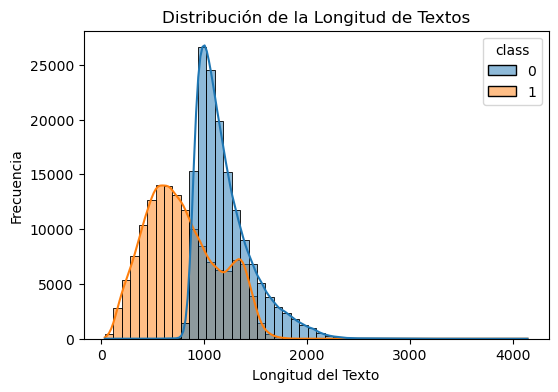

In [24]:
# 2. Longitud de los textos
plt.figure(figsize=(6, 4))
sns.histplot(data=df_complete, x='len_text', hue='class', bins=50, kde=True)
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

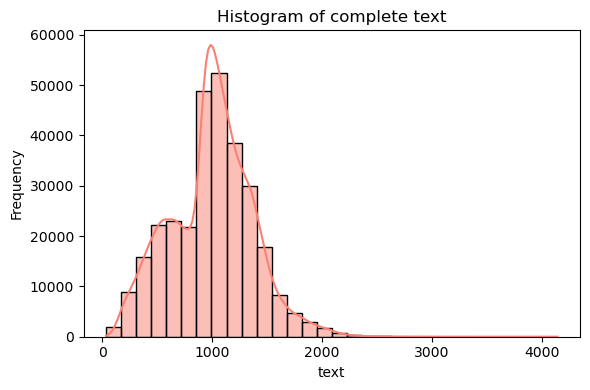

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df_complete['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of complete text')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

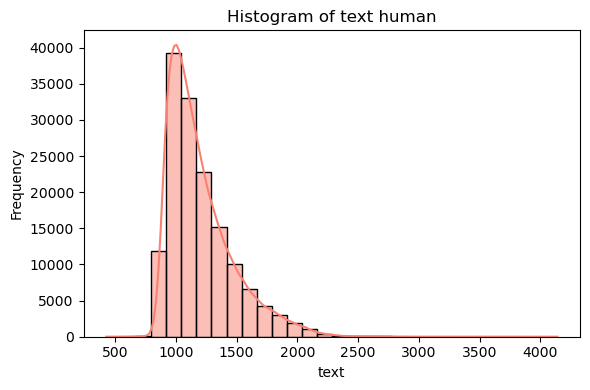

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df_class_human['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of text human')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

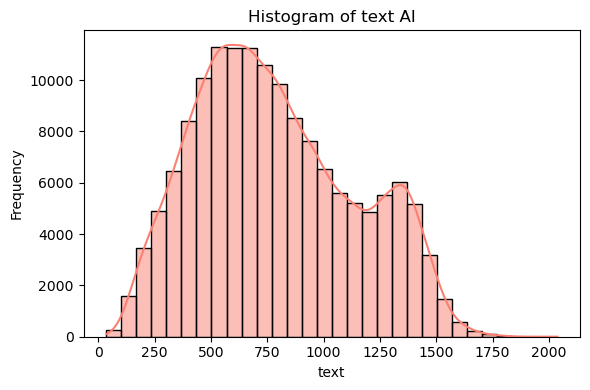

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df_class_ai['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of text AI')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

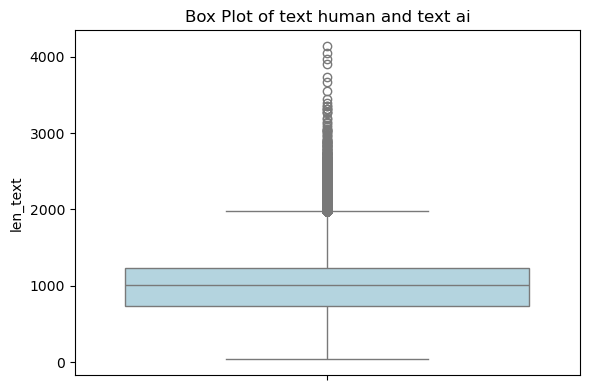

In [12]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_complete['len_text'], color="lightblue") 
plt.title(f'Box Plot of text human and text ai') 
plt.tight_layout()
plt.show()

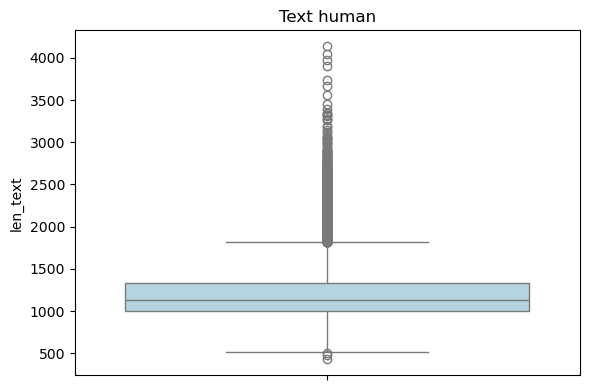

In [13]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_class_human['len_text'], color="lightblue") 
plt.title(f'Text human') 
plt.tight_layout()
plt.show()

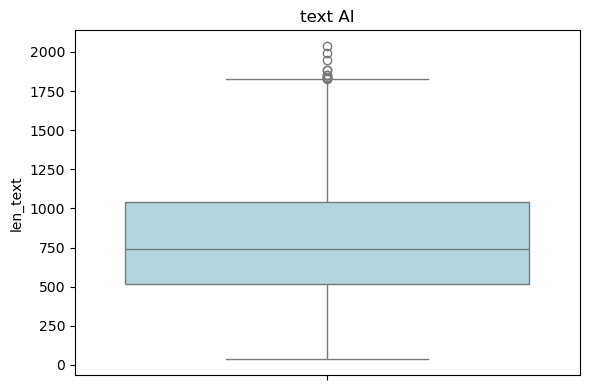

In [14]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df_class_ai['len_text'], color="lightblue") 
plt.title(f'text AI') 
plt.tight_layout()
plt.show()

## Aplicacion de iqr para eliminacion de outliers

### Data frame complete

In [15]:

# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_complete['len_text'].quantile(0.25)
Q3 = df_complete['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_complete_sin_outliers = df_complete[(df_complete['len_text'] >= lower_bound) & (df_complete['len_text'] <= upper_bound)]


In [29]:
df_complete_sin_outliers['class'].value_counts(normalize=True)


class
1    0.504443
0    0.495557
Name: proportion, dtype: float64

In [24]:
df_complete_sin_outliers['class'].value_counts() # se eliminan 3.107 outliers menos que si se filtraba por clase

class
1    149998
0    147356
Name: count, dtype: int64

### bar plot percentages

In [15]:


# Gráfico de barras
sns.countplot(x='class', data=df_complete_sin_outliers)
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()


NameError: name 'df_complete_sin_outliers' is not defined

### Data frame human

In [16]:
# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_class_human['len_text'].quantile(0.25)
Q3 = df_class_human['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_human_sin_outliers = df_class_human[(df_class_human['len_text'] >= lower_bound) & (df_class_human['len_text'] <= upper_bound)]

In [21]:
df_human_sin_outliers.info() # se han eliminado 5.751 outliers

<class 'pandas.core.frame.DataFrame'>
Index: 144249 entries, 3 to 299996
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      144249 non-null  object
 1   class     144249 non-null  int64 
 2   len_text  144249 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB


### Data frame AI

In [18]:
# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_class_ai['len_text'].quantile(0.25)
Q3 = df_class_ai['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_ai_sin_outliers = df_class_ai[(df_class_ai['len_text'] >= lower_bound) & (df_class_ai['len_text'] <= upper_bound)]

In [23]:
df_ai_sin_outliers.info() # se han eliminado 12 outliers

<class 'pandas.core.frame.DataFrame'>
Index: 149988 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      149988 non-null  object
 1   class     149988 non-null  int64 
 2   len_text  149988 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [31]:
# Supongamos que df1 y df2 son tus dataframes
df_combined = pd.concat([df_human_sin_outliers, df_ai_sin_outliers], axis=0, ignore_index=True)

In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294237 entries, 0 to 294236
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      294237 non-null  object
 1   class     294237 non-null  int64 
 2   len_text  294237 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ MB


In [34]:
df_combined['class'].value_counts(normalize=True)

class
1    0.509752
0    0.490248
Name: proportion, dtype: float64

### bar plot percentaje class

In [ ]:

# Gráfico de barras
sns.countplot(x='class', data=df_combined)
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

No veo que haya mucha diferencia en la proporcion de clases que tienen los data frame si se quitan los outilers en el dataframe sin separar las clases que por separado

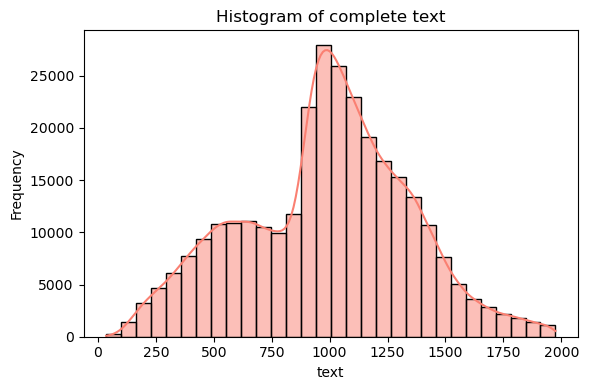

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df_complete_sin_outliers['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of complete text')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

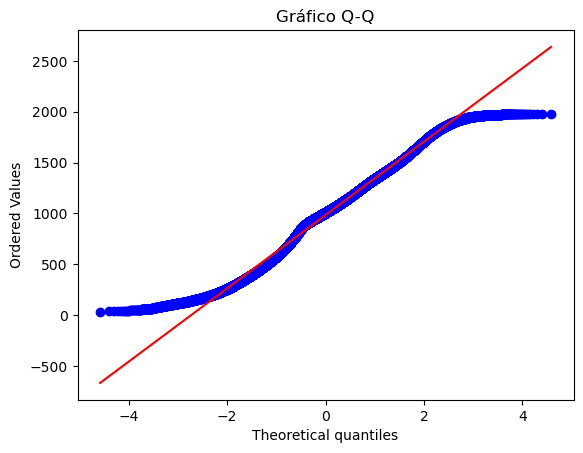

In [40]:
# Gráfico Q-Q
stats.probplot(df_complete_sin_outliers['len_text'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

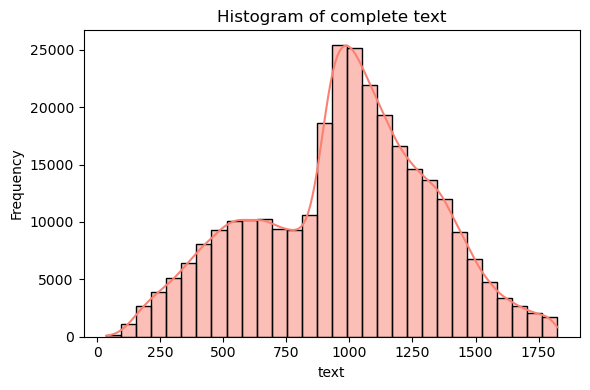

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df_combined['len_text'], kde=True, bins=30, color="salmon")  # Histograma con KDE
plt.title(f'Histogram of combined text')  
plt.xlabel('text')  
plt.ylabel('Frequency') 
plt.tight_layout()  
plt.show()

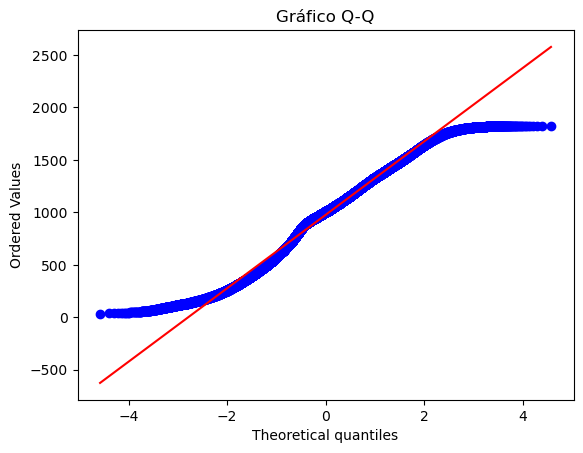

In [43]:
# Gráfico Q-Q
stats.probplot(df_combined['len_text'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

### Skewness and kurtosis

In [44]:
from scipy.stats import skew, kurtosis

# Calcular skewness y kurtosis para 'len_text'
skew_len_text = skew(df_complete_sin_outliers['len_text'])
kurt_len_text = kurtosis(df_complete_sin_outliers['len_text'])

# Imprimir resultados
print(f"Len_text - Skewness: {skew_len_text}, Kurtosis: {kurt_len_text}")


Len_text - Skewness: -0.10093032278688409, Kurtosis: -0.2972803017950505


Sesgo cercano a cero: Indica una distribución aproximadamente simétrica.
Kurtosis negativa: Sugiere que la distribución tiene colas más ligeras y un pico menos pronunciado en comparación con una distribución normal.

### Guardado de dataframe a csv

In [47]:
df_complete_sin_outliers.to_csv('complete_without_outliers.csv', index=False)
